In [249]:
import numpy as np
import mlrose_hiive as mlrh
import mlrose 
import matplotlib.pyplot as plt
my_random_state = 318
import time
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
# from sklearn.datasets import load_iris
algorithms = ['RHC', 'SA', 'GA', 'MIMIC']


# Travelling Salesperson Problems
https://mlrose.readthedocs.io/en/stable/source/tutorial2.html#tutorial2
http://www.math.uwaterloo.ca/tsp/poke/index.html

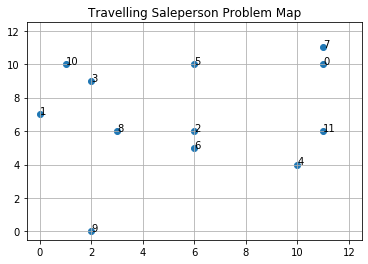

[(11, 10), (0, 7), (6, 6), (2, 9), (10, 4), (6, 10), (6, 5), (11, 11), (3, 6), (2, 0), (1, 10), (11, 6)]


In [250]:
#### Create list of city coordinates

# coords_list = [(1, 1), (4, 2), (5, 2), (6, 4), (4, 4), (3, 6), (1, 5), (2, 3)] # example given in tutorial

# generate random n cities on a m*m grid
n_grid = 12
n_cities = 12
random.seed(my_random_state)
coords_list  = []
coords_x  = []
coords_y  = []
while len(coords_list) < n_cities:
    newcoord = (random.randrange(n_grid),random.randrange(n_grid))
    if newcoord not in coords_list:
        coords_list.append(newcoord)
        coords_x.append(newcoord[0])
        coords_y.append(newcoord[1])

# plt.figure()
# plt.plot(coords_x,coords_y,'o--')
fig, ax = plt.subplots()
ax.scatter(coords_x,coords_y)
for i in range(n_cities):
    ax.annotate(i, (coords_x[i], coords_y[i]))
plt.title('Travelling Saleperson Problem Map')
plt.xlim(-0.5,n_grid+0.5)
plt.ylim(-0.5,n_grid+0.5)
plt.grid()
plt.savefig('TSP_figures/tsp_map.png')
plt.show()

print(coords_list)

# Define optimization problem object
problem_tsp = mlrose.TSPOpt(length = n_cities, coords = coords_list)#, maximize=False)

In [251]:
time_optim_tsp = np.zeros(4) # four random search algorithms
best_fitness_tsp = np.zeros(4)

my_max_attempts = 100

random hill climbing time 0.12258809999912046 seconds

best_state [ 0 11  4  2  6  9  1 10  3  8  5  7]
best_fitness 44.229226455515374

tour [(11, 10), (11, 6), (10, 4), (6, 6), (6, 5), (2, 0), (0, 7), (1, 10), (2, 9), (3, 6), (6, 10), (11, 11)]


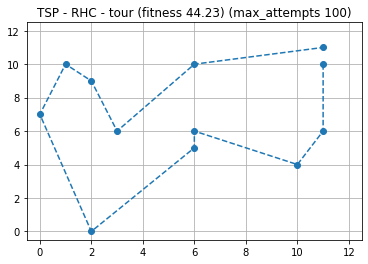

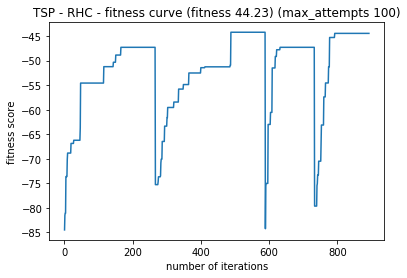

In [252]:
#### Algorithm 1: RHC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_tsp, random_state = my_random_state, 
                                                                   restarts = 3,
                                                                   max_attempts = my_max_attempts, 
                                                                   curve=True) 
toc = time.perf_counter() 
time_optim_tsp[0] = toc-tic
print(f"random hill climbing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_tsp[0] = best_fitness

tour = [coords_list[i] for i in best_state] 
print('tour',tour)

tour_x = [ tour[i][0] for i in range(n_cities) ]
tour_y = [ tour[i][1] for i in range(n_cities) ]

plt.figure()
plt.plot(tour_x,tour_y,'o--')
plt.title('TSP - RHC - tour (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlim(-0.5,n_grid+0.5)
plt.ylim(-0.5,n_grid+0.5)
plt.grid()
plt.savefig('TSP_figures/tsp_rhc_tour.png')
plt.show()

plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('TSP - RHC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('TSP_figures/tsp_rhc_fitnesscurve.png')
plt.show()

simulated annealing time 0.04982939999899827 seconds

best_state [ 6  4 11  0  7  5  8  9  1  3 10  2]
best_fitness 46.4668304608411

tour [(6, 5), (10, 4), (11, 6), (11, 10), (11, 11), (6, 10), (3, 6), (2, 0), (0, 7), (2, 9), (1, 10), (6, 6)]


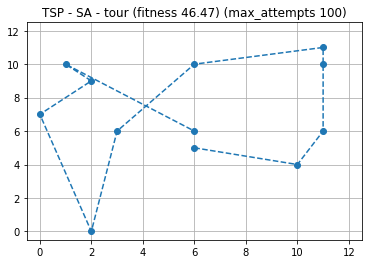

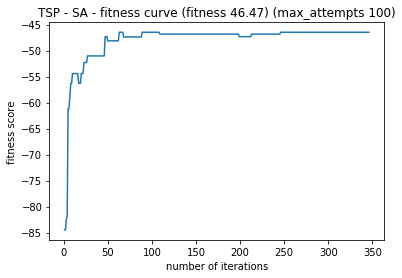

In [253]:
#### Algorithm 2: SA

tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_tsp, random_state = my_random_state, 
                                                                     max_attempts = my_max_attempts,
                                                                     curve=True) 
toc = time.perf_counter() 
time_optim_tsp[1] = toc-tic
print(f"simulated annealing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_tsp[1] = best_fitness

tour = [coords_list[i] for i in best_state] 
print('tour',tour)

tour_x = [ tour[i][0] for i in range(n_cities) ]
tour_y = [ tour[i][1] for i in range(n_cities) ]

plt.figure()
plt.plot(tour_x,tour_y,'o--')
plt.title('TSP - SA - tour (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlim(-0.5,n_grid+0.5)
plt.ylim(-0.5,n_grid+0.5)
plt.grid()
plt.savefig('TSP_figures/tsp_sa_tour.png')
plt.show()

plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('TSP - SA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('TSP_figures/tsp_sa_fitnesscurve.png')
plt.show()

generic algorithm time 6.857150800002273 seconds

best_state [ 2  9  1 10  5  7  0 11  4  6  8  3]
best_fitness 50.43623853742387

tour [(6, 6), (2, 0), (0, 7), (1, 10), (6, 10), (11, 11), (11, 10), (11, 6), (10, 4), (6, 5), (3, 6), (2, 9)]


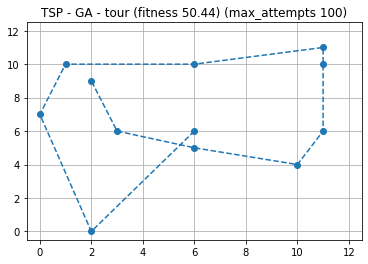

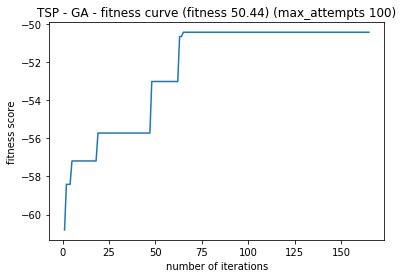

In [262]:
#### Algorithm 3: GA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_tsp, random_state = my_random_state,
                                                             mutation_prob = 0.2,
                                                             max_attempts = my_max_attempts, 
                                                             curve=True) 
toc = time.perf_counter() 
time_optim_tsp[2] = toc-tic
print(f"generic algorithm time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
# print('fitness_curve',fitness_curve)
print()
best_fitness_tsp[2] = best_fitness

tour = [coords_list[i] for i in best_state] 
print('tour',tour)

tour_x = [ tour[i][0] for i in range(n_cities) ]
tour_y = [ tour[i][1] for i in range(n_cities) ]

plt.figure()
plt.plot(tour_x,tour_y,'o--')
plt.title('TSP - GA - tour (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlim(-0.5,n_grid+0.5)
plt.ylim(-0.5,n_grid+0.5)
plt.grid()
plt.savefig('TSP_figures/tsp_ga_tour.png')
plt.show()

plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('TSP - GA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('TSP_figures/tsp_ga_fitnesscurve.png')
plt.show()

MIMIC time 17.345743300000322 seconds

best_state [ 9  8  1 10  3  2  6  5  7  0 11  4]
best_fitness 46.10089081409981

tour [(2, 0), (3, 6), (0, 7), (1, 10), (2, 9), (6, 6), (6, 5), (6, 10), (11, 11), (11, 10), (11, 6), (10, 4)]


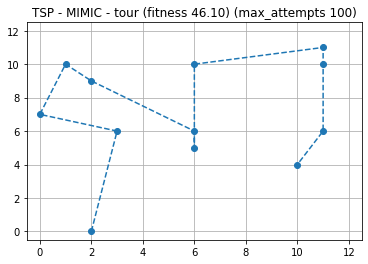

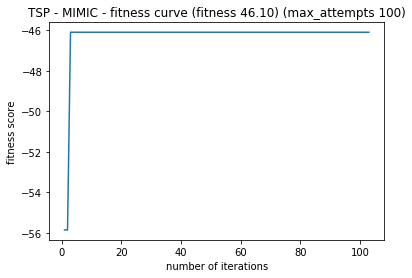

In [255]:
#### Algorithm 4: MIMIC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.mimic(problem_tsp, random_state = my_random_state, 
                                                       max_attempts = my_max_attempts,
#                                                        keep_pct = 0.3,
                                                       curve=True) 
toc = time.perf_counter() 
time_optim_tsp[3] = toc-tic
print(f"MIMIC time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_tsp[3] = best_fitness

tour = [coords_list[i] for i in best_state] 
print('tour',tour)

tour_x = [ tour[i][0] for i in range(n_cities) ]
tour_y = [ tour[i][1] for i in range(n_cities) ]

plt.figure()
plt.plot(tour_x,tour_y,'o--')
plt.title('TSP - MIMIC - tour (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlim(-0.5,n_grid+0.5)
plt.ylim(-0.5,n_grid+0.5)
plt.grid()
plt.savefig('TSP_figures/tsp_mimic_tour.png')
plt.show()

plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('TSP - MIMIC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('TSP_figures/tsp_mimic_fitnesscurve.png')
plt.show()

In [263]:
time_optim_tsp 

array([ 0.1225881,  0.0498294,  6.8571508, 17.3457433])

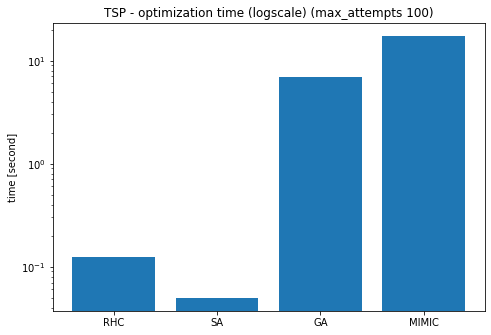

In [264]:
algorithms = ['RHC', 'SA', 'GA', 'MIMIC']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(algorithms,time_optim_tsp)

# plt.ylim(.1, 2000)
plt.title('TSP - optimization time (logscale) (max_attempts {0})'.format(my_max_attempts))
ax.set_yscale('log')
plt.ylabel("time [second]")
fig.tight_layout()
plt.savefig('TSP_figures/TSP_optimization_time.png') 
plt.show()

In [265]:
best_fitness_tsp

array([44.22922646, 46.46683046, 50.43623854, 46.10089081])

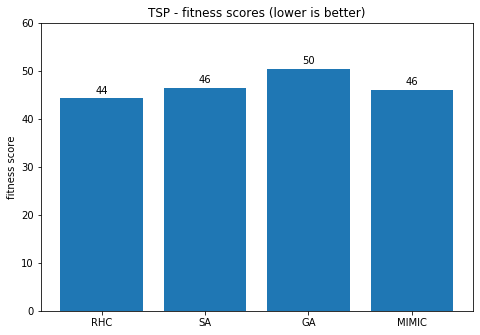

In [266]:
#### https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

# x = np.arange(4) # four classifiers
# width = 0.4  # the width of the bars

# fig, ax = plt.subplots()
# rects = ax.bar(x, best_fitness_knapsack, width)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(algorithms,best_fitness_tsp)

plt.gca().set_ylim(0, 60)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fitness score')
ax.set_title('TSP - fitness scores (lower is better)')
# ax.set_xticks(x)
# ax.set_xticklabels(algorithms)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()
plt.savefig('TSP_figures/TSP_fitness.png') 

plt.show()

# Knapsack - MIMIC (GA?)

In [123]:


# n_knapsack = 5
# weights = [10, 5, 2, 8, 15] # example given in tutorial
# values = [1, 2, 3, 4, 5]  # example given in tutorial

n_knapsack = 20
values = np.arange(20)+1
weights = [1+random.randrange(n_knapsack*2) for _ in range(n_knapsack)]

print('values',values)
print('weights',weights)

fitness = mlrose.Knapsack(weights, values) # max_weight_pct (float, default: 0.35)

# Define optimization problem object
problem_knapsack = mlrose.DiscreteOpt(length = n_knapsack, fitness_fn = fitness)
# The Knapsack fitness function is suitable for use in discrete-state optimization problems only.

values [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
weights [22, 26, 8, 39, 35, 19, 1, 34, 19, 5, 24, 7, 35, 26, 11, 28, 29, 15, 3, 25]


In [136]:
time_optim_knapsack = np.zeros(4) # four random search algorithms
best_fitness_knapsack = np.zeros(4)
my_max_attempts = 100

random hill climbing time 0.01471069999752217 seconds

best_state [0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0]
best_fitness 118.0



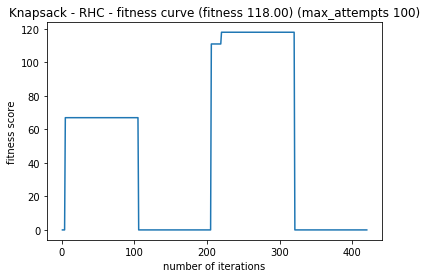

In [137]:
#### Algorithm 1: RHC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_knapsack, random_state = my_random_state, 
                                                                   restarts = 3,
                                                                   max_attempts = my_max_attempts, 
                                                                   curve=True) 
toc = time.perf_counter() 
time_optim_knapsack[0] = toc-tic
print(f"random hill climbing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_knapsack[0] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Knapsack - RHC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('Knapsack_figures/Knapsack_RHC_fitnesscurve.png')
plt.show()

simulated annealing time 0.006785899997339584 seconds

best_state [0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 1 1 0]
best_fitness 94.0



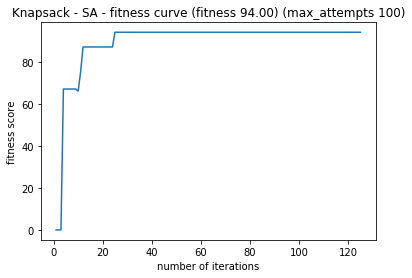

In [138]:
#### Algorithm 2: SA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_knapsack, random_state = my_random_state, 
                                                                     max_attempts = my_max_attempts, 
                                                                     curve=True) 
toc = time.perf_counter() 
time_optim_knapsack[1] = toc-tic
print(f"simulated annealing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_knapsack[1] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Knapsack - SA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('Knapsack_figures/Knapsack_SA_fitnesscurve.png')
plt.show()

genetic algorithm time 2.531061400000908 seconds

best_state [0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1]
best_fitness 138.0



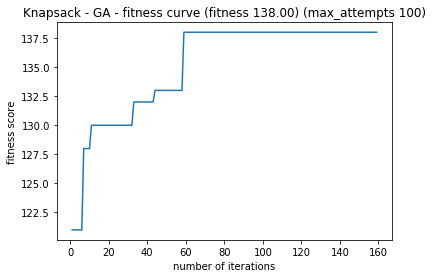

In [139]:
#### Algorithm 3: GA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_knapsack, random_state = my_random_state, 
                                                             max_attempts = my_max_attempts, 
                                                             curve=True) 
toc = time.perf_counter() 
time_optim_knapsack[2] = toc-tic
print(f"genetic algorithm time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_knapsack[2] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Knapsack - GA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('Knapsack_figures/Knapsack_GA_fitnesscurve.png')
plt.show()

MIMIC time 15.058377199999086 seconds

best_state [0 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 1 1]
best_fitness 138.0



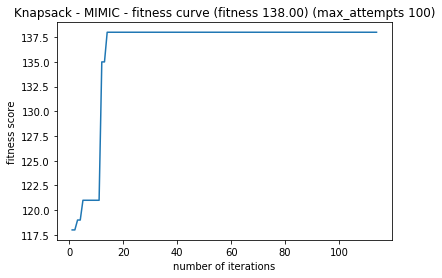

In [140]:
#### Algorithm 3: MIMIC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.mimic(problem_knapsack, random_state = my_random_state, 
                                                       max_attempts = my_max_attempts, 
                                                       curve=True) 
toc = time.perf_counter() 
time_optim_knapsack[3] = toc-tic
print(f"MIMIC time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_knapsack[3] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Knapsack - MIMIC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('Knapsack_figures/Knapsack_MIMIC_fitnesscurve.png')
plt.show()

In [133]:
time_optim_knapsack

array([1.26556900e-01, 4.35805000e-02, 1.89622590e+01, 1.30541592e+02])

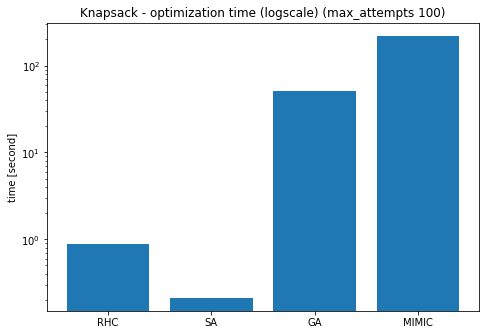

In [141]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(algorithms,time_optim)

# plt.ylim(.1, 2000)
plt.title('Knapsack - optimization time (logscale) (max_attempts {0})'.format(my_max_attempts))
ax.set_yscale('log')
plt.ylabel("time [second]")
fig.tight_layout()
plt.savefig('Knapsack_figures/Knapsack_optimization_time.png') 
plt.show()

In [142]:
# best_fitness_knapsack = [122., 94, 138, 138]
best_fitness_knapsack

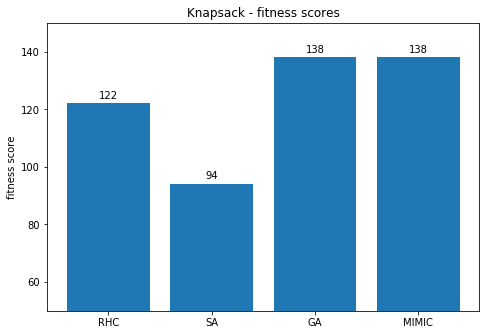

In [160]:
#### https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

# x = np.arange(4) # four classifiers
# width = 0.4  # the width of the bars

# fig, ax = plt.subplots()
# rects = ax.bar(x, best_fitness_knapsack, width)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(algorithms,best_fitness_knapsack)

plt.gca().set_ylim(50, 150)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fitness score')
ax.set_title('Knapsack - fitness scores')
# ax.set_xticks(x)
# ax.set_xticklabels(algorithms)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()
# plt.savefig('Knapsack_figures/Knapsack_fitness.png') 

plt.show()

# Continuous Peaks  - SA

In [185]:
#
fitness = mlrose.ContinuousPeaks(t_pct=0.1) # no random_state
# t_pct (float, default: 0.1)

n_contpeaks = 50 # arbitrary??
# Define optimization problem object
problem_contpeaks = mlrose.DiscreteOpt(length = n_contpeaks, fitness_fn = fitness)

# The Continuous Peaks fitness function is suitable for use in bit-string (discrete-state with max_val = 2 (default)) optimization problems only.

In [186]:
time_optim_contpeaks = np.zeros(4)
best_fitness_contpeaks = np.zeros(4)
my_max_attempts = 100

random hill climbing time 0.05184169999847654 seconds

best_state [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0 1 0 1 0
 0 0 0 0 0 1 1 1 1 0 1 0 1]
best_fitness 69.0



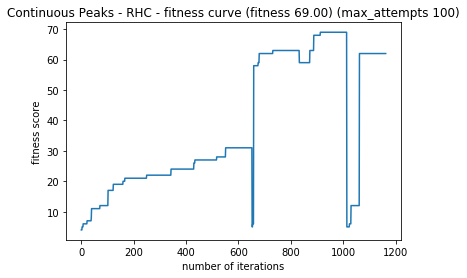

In [187]:
#### Algorithm 1: RHC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_contpeaks, random_state = my_random_state, 
                                                                   restarts = 3,
                                                                   max_attempts = my_max_attempts, 
                                                                   curve=True) 
toc = time.perf_counter() 
time_optim_contpeaks[0] = toc-tic
print(f"random hill climbing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_contpeaks[0] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Continuous Peaks - RHC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('contpeaks_figures/contpeaks_RHC_fitnesscurve.png')
plt.show()

simulated annealing time 0.11171709999325685 seconds

best_state [1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]
best_fitness 94.0



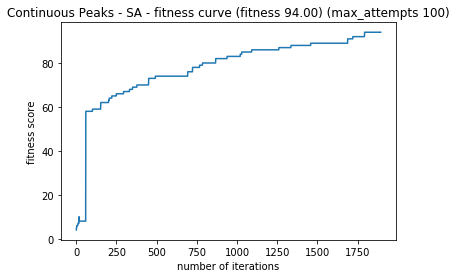

In [188]:
#### Algorithm 2: SA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_contpeaks, random_state = my_random_state, 
                                                                     max_attempts = my_max_attempts, 
                                                                     curve=True) 
toc = time.perf_counter() 
time_optim_contpeaks[1] = toc-tic
print(f"simulated annealing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_contpeaks[1] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Continuous Peaks - SA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('contpeaks_figures/contpeaks_SA_fitnesscurve.png')
plt.show()

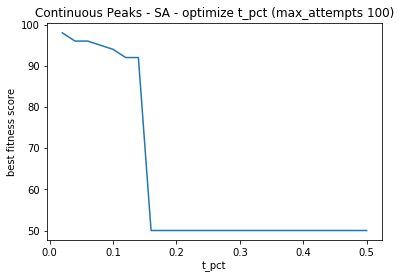

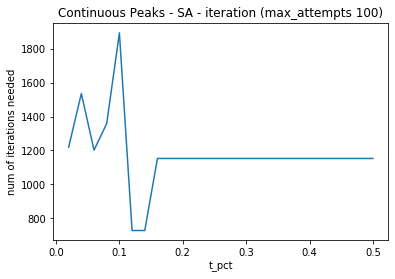

In [213]:
#### further tune threshold parameter (T) default t_pct = 0.1

t_pct_all = np.linspace(0.02,0.5,25)
best_fitness_tpct = []
num_iter_tpct = []
for tpct in t_pct_all:
#     print('----------------')
#     print('tpct',tpct)
    fit = mlrose.ContinuousPeaks(t_pct=tpct) # no random_state
    prob_contpeaks = mlrose.DiscreteOpt(length = n_contpeaks, fitness_fn = fit)
    
    tic = time.perf_counter() 
    best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(prob_contpeaks, random_state = my_random_state, 
                                                                         max_attempts = my_max_attempts, 
                                                                         curve=True) 
    toc = time.perf_counter() 
#     print(f"simulated annealing time {toc - tic} seconds")
#     print('best_state',best_state)
#     print('best_fitness',best_fitness)
#     print()
    best_fitness_tpct.append(best_fitness)
    num_iter_tpct.append(len(fitness_curve))


plt.figure()
plt.plot(t_pct_all, best_fitness_tpct)
plt.title('Continuous Peaks - SA - optimize t_pct (max_attempts {0})'.format(my_max_attempts))
plt.xlabel('t_pct')
plt.ylabel('best fitness score')
plt.savefig('contpeaks_t_pct/contpeaks_SA_optimize_tpct.png')
plt.show()

plt.figure()
plt.plot(t_pct_all, num_iter_tpct)
plt.title('Continuous Peaks - SA - iteration (max_attempts {0})'.format(my_max_attempts))
plt.xlabel('t_pct')
plt.ylabel('num of iterations needed')
plt.savefig('contpeaks_t_pct/contpeaks_SA_numiter_tpct.png')
plt.show()

genetic algorithm time 3.1780023999963305 seconds

best_state [0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 1 1 1 0 1 1 1 0 0 0 0 0]
best_fitness 70.0



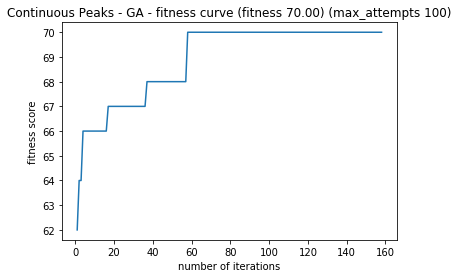

In [189]:
#### Algorithm 3: GA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_contpeaks, random_state = my_random_state, 
                                                                     max_attempts = my_max_attempts, 
                                                                     curve=True) 
toc = time.perf_counter() 
time_optim_contpeaks[2] = toc-tic
print(f"genetic algorithm time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_contpeaks[2] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Continuous Peaks - GA - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('contpeaks_figures/contpeaks_GA_fitnesscurve.png')
plt.show()

MIMIC time 88.70380579999619 seconds

best_state [1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 0 1]
best_fitness 76.0



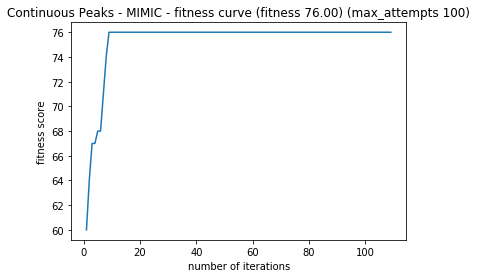

In [190]:
#### Algorithm 4: MIMIC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.mimic(problem_contpeaks, random_state = my_random_state, 
                                                       max_attempts = my_max_attempts, 
                                                       curve=True) 
toc = time.perf_counter() 
time_optim_contpeaks[3] = toc-tic
print(f"MIMIC time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_contpeaks[3] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Continuous Peaks - MIMIC - fitness curve (fitness {0:.2f}) (max_attempts {1})'.format(best_fitness, my_max_attempts))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('contpeaks_figures/contpeaks_MIMIC_fitnesscurve.png')
plt.show()

In [191]:
time_optim_contpeaks

array([5.18417000e-02, 1.11717100e-01, 3.17800240e+00, 8.87038058e+01])

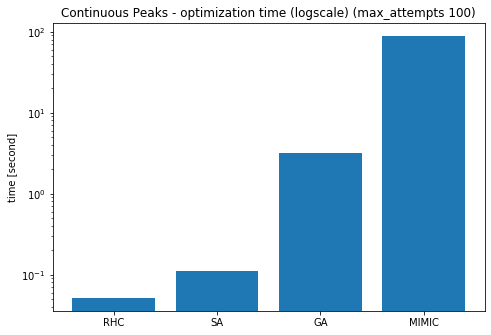

In [192]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(algorithms,time_optim_contpeaks)

# plt.ylim(.1, 2000)
plt.title('Continuous Peaks - optimization time (logscale) (max_attempts {0})'.format(my_max_attempts))
ax.set_yscale('log')
plt.ylabel("time [second]")
fig.tight_layout()
plt.savefig('contpeaks_figures/contpeaks_optimization_time.png') 
plt.show()

In [193]:
best_fitness_contpeaks

array([69., 94., 70., 76.])

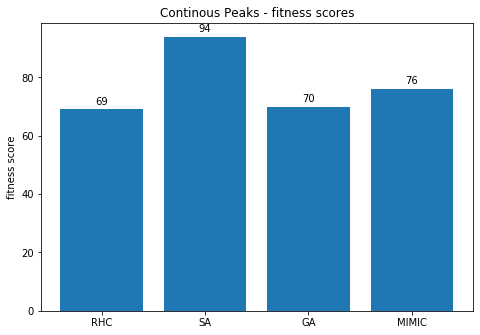

In [195]:
#### https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(algorithms,best_fitness_contpeaks)

# plt.gca().set_ylim(0, 40)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fitness score')
ax.set_title('Continous Peaks - fitness scores')
# ax.set_xticks(x)
# ax.set_xticklabels(algorithms)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()
plt.savefig('contpeaks_figures/contpeaks_fitness.png') 

plt.show()

# Flip Flop - GA?

In [269]:
#
fitness = mlrose.FlipFlop() # no random_state

n_flip = 50 # arbitrary??
# Define optimization problem object
problem_flip = mlrose.DiscreteOpt(length = n_flip, fitness_fn = fitness)

# The Flip Flop fitness function is suitable for use in discrete-state optimization problems only.

In [270]:
time_optim_flip = np.zeros(4)
best_fitness_flip = np.zeros(4)
my_max_attempts = 100

random hill climbing time 0.024351299995032605 seconds

best_state [1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1
 0 1 0 1 0 0 1 0 0 1 0 1 0]
best_fitness 41.0



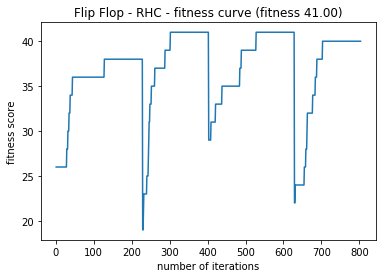

In [275]:
#### Algorithm 1: RHC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.random_hill_climb(problem_flip, random_state = my_random_state, 
                                                                   restarts = 3,
                                                                   max_attempts = my_max_attempts, 
                                                                   curve=True) 
toc = time.perf_counter() 
time_optim_flip[0] = toc-tic
print(f"random hill climbing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_flip[0] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Flip Flop - RHC - fitness curve (fitness {0:.2f})'.format(best_fitness))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('flip_figures/flip_RHC_fitnesscurve.png')
plt.show()

simulated annealing time 0.013570199997047894 seconds

best_state [0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 1 0 1 1 1 0 1 0 1 0 1 0]
best_fitness 42.0



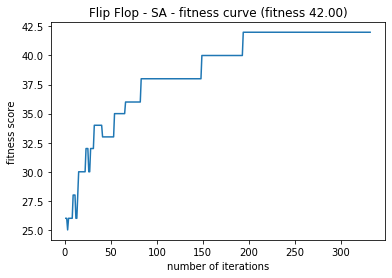

In [286]:
#### Algorithm 2 SA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.simulated_annealing(problem_flip, random_state = my_random_state, 
#                                                                      max_attempts = my_max_attempts/5, 
                                                                     curve=True) 
toc = time.perf_counter() 
time_optim_flip[1] = toc-tic
print(f"simulated annealing time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_flip[1] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Flip Flop - SA - fitness curve (fitness {0:.2f})'.format(best_fitness))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('flip_figures/flip_SA_fitnesscurve.png')
plt.show()

genetic algorithm time 4.340063100004045 seconds

best_state [1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 1]
best_fitness 42.0



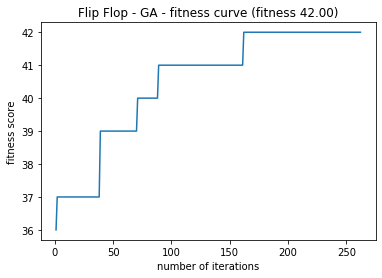

In [296]:
#### Algorithm 3 GA
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.genetic_alg(problem_flip, random_state = my_random_state, 
                                                             max_attempts = my_max_attempts, 
                                                             mutation_prob = 0.05,
                                                             curve=True) 
toc = time.perf_counter() 
time_optim_flip[2] = toc-tic
print(f"genetic algorithm time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_flip[2] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Flip Flop - GA - fitness curve (fitness {0:.2f})'.format(best_fitness))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('flip_figures/flip_GA_fitnesscurve.png')
plt.show()

MIMIC time 87.30733869999676 seconds

best_state [1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0]
best_fitness 45.0



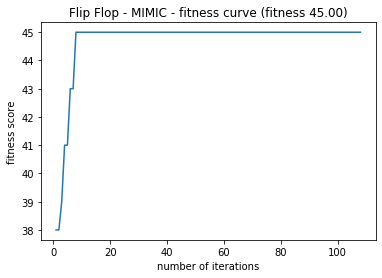

In [287]:
#### Algorithm 4 MIMIC
tic = time.perf_counter() 
best_state, best_fitness, fitness_curve = mlrose.mimic(problem_flip, random_state = my_random_state, 
                                                       max_attempts = my_max_attempts, 
                                                       curve=True) 
toc = time.perf_counter() 
time_optim_flip[3] = toc-tic
print(f"MIMIC time {toc - tic} seconds")
print()

print('best_state',best_state)
print('best_fitness',best_fitness)
print()
best_fitness_flip[3] = best_fitness


plt.figure()
plt.plot(np.arange(len(fitness_curve))+1, fitness_curve)
plt.title('Flip Flop - MIMIC - fitness curve (fitness {0:.2f})'.format(best_fitness))
plt.xlabel('number of iterations')
plt.ylabel('fitness score')
plt.savefig('flip_figures/flip_MIMIC_fitnesscurve.png')
plt.show()

In [288]:
time_optim_flip 

array([2.43513000e-02, 1.35702000e-02, 1.06899708e+01, 8.73073387e+01])

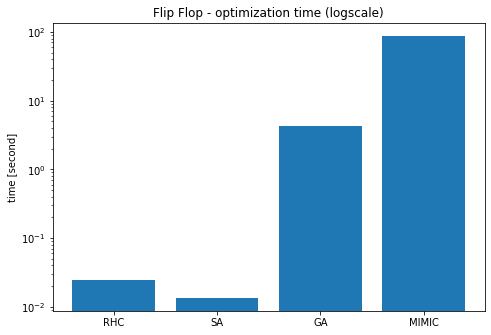

In [297]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(algorithms,time_optim_flip)

# plt.ylim(.1, 2000)
plt.title('Flip Flop - optimization time (logscale)')
ax.set_yscale('log')
plt.ylabel("time [second]")
fig.tight_layout()
plt.savefig('flip_figures/flip_optimization_time.png') 
plt.show()

In [289]:
best_fitness_flip

array([41., 42., 42., 45.])

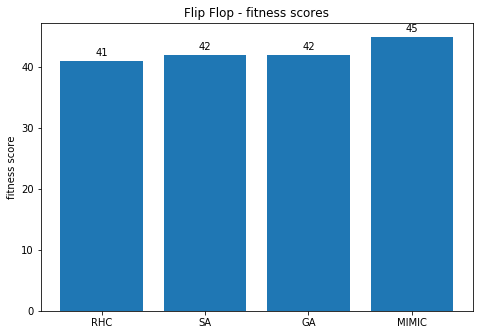

In [298]:
#### https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
rects = ax.bar(algorithms,best_fitness_flip)

# plt.gca().set_ylim(0, 40)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('fitness score')
ax.set_title('Flip Flop - fitness scores')
# ax.set_xticks(x)
# ax.set_xticklabels(algorithms)
# ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:0.0f}'.format(height),
                    xy=(rect.get_x() + rect.get_width()/2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects)

fig.tight_layout()
plt.savefig('flip_figures/flip_fitness.png') 

plt.show()